## Estudiante : César Puentes
## Profesor : Andrés Felipe Callejas
## Materia : Big Data - PREICA2502B020061


___________

# 1️⃣ Define la problemática y registra el dataset

1.1 Problemática: Sistema de Alerta Temprana y Evaluación de Riesgo de Tsunamis
Contexto: Los terremotos de gran magnitud, especialmente aquellos con epicentros submarinos y poca profundidad, tienen un alto potencial de generar tsunamis devastadores. Las agencias de gestión de emergencias y protección civil necesitan herramientas analíticas que les permitan no solo registrar eventos, sino identificar patrones de riesgo para mejorar sus protocolos de respuesta.

Necesidad Analítica: Se requiere una base de datos que permita historizar eventos sísmicos y sus métricas técnicas asociadas para responder preguntas complejas como:

- ¿Qué combinación de magnitud y profundidad es más propensa a generar alertas de tsunami?

- ¿Existen zonas geográficas con mayor frecuencia de eventos de alto riesgo?

- ¿Cómo se correlaciona la intensidad instrumental con el impacto percibido por la comunidad?

1.2 Selección del Dataset
Nombre: Global Earthquake & Tsunami Risk Assessment Dataset

**Justificación**: Este dataset es ideal porque contiene variables físicas puras (magnitud, profundidad, ubicación) y variables derivadas de evaluación (intensidad, significancia), lo que permite un modelado relacional claro y análisis interesantes.

_____

In [12]:
import pandas as pd
import sqlite3
import kagglehub
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de gráficos
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Librerías cargadas correctamente.")

Librerías cargadas correctamente.


Definición de la Problemática
Problema: Análisis predictivo de riesgo sísmico y tsunami para organismos de protección civil

Para quién: Agencias gubernamentales de gestión de emergencias, organizaciones humanitarias y centros de investigación sismológica

Por qué requiere analítica:

Necesidad de predecir zonas de alto riesgo sísmico

Optimización de recursos para sistemas de alerta temprana

Análisis histórico para identificar patrones de comportamiento sísmico

Evaluación de correlación entre magnitud de terremotos y probabilidad de tsunami

In [13]:
# 1. Descarga del dataset
path = kagglehub.dataset_download("ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset")
csv_file = [f for f in os.listdir(path) if f.endswith('.csv')][0]
df = pd.read_csv(os.path.join(path, csv_file))

In [14]:
print(f"Dataset cargado: {df.shape[0]} registros.")

# 2. Preprocesamiento y Enriquecimiento para Analítica
# Crear ID único
df['event_id'] = df.index + 1

# Enriquecimiento 1: Clasificación de Zona Sísmica basada en latitud
def get_region(lat):
    if abs(lat) <= 23.5: return 'Tropical'
    elif abs(lat) <= 66.5: return 'Templada'
    else: return 'Polar'
df['region'] = df['latitude'].apply(get_region)

# Enriquecimiento 2: Estimación simple de Nivel de Alerta (Simulada para el ejercicio)
# Basado en magnitud y profundidad (sismos superficiales y fuertes son más peligrosos)
def get_alert_level(row):
    if row['magnitude'] >= 7.5 and row['depth'] <= 50:
        return 'ALTA'
    elif row['magnitude'] >= 6.5:
        return 'MEDIA'
    else:
        return 'BAJA'
df['alert_level'] = df.apply(get_alert_level, axis=1)

# Enriquecimiento 3: Probabilidad Tsunami Estimada (Simulada)
df['tsunami_prob'] = df.apply(lambda x: min(0.95, x['magnitude']/9.5) if x['depth'] < 70 else min(0.4, x['magnitude']/20), axis=1)

print("Datos enriquecidos con nuevas variables analíticas.")
df.head(3)

Dataset cargado: 782 registros.
Datos enriquecidos con nuevas variables analíticas.


,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami,event_id,region,alert_level,tsunami_prob
0,7.0,8,7,768,117,0.509,17.0,14.0,-9.7963,159.596,2022,11,1,1,Tropical,MEDIA,0.736842
1,6.9,4,4,735,99,2.229,34.0,25.0,-4.9559,100.738,2022,11,0,2,Tropical,MEDIA,0.726316
2,7.0,3,3,755,147,3.125,18.0,579.0,-20.0508,-178.346,2022,11,1,3,Tropical,MEDIA,0.350000


In [15]:
df.describe()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami,event_id,tsunami_prob
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747,391.500000,0.650595
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778,225.888247,0.161802
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000,1.000000,0.325000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000,196.250000,0.684211
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000,391.500000,0.705263
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000,586.750000,0.736842
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000,782.000000,0.950000


_________________________________

# 2️⃣ Modelo Entidad–Relación (ERD)
Para cumplir con el paradigma relacional, normalizaremos la información separando los hechos físicos de sus evaluaciones técnicas.

Entidades:

EVENTS (Hechos Físicos): Almacena los datos inmutables del fenómeno natural (magnitud, localización, profundidad).

RISK_ASSESSMENT (Evaluación de Riesgo): Almacena las métricas derivadas del análisis instrumental y humano (intensidad, significancia, alertas).

Relación: Un evento sísmico genera una evaluación de riesgo (1:1 en este dataset, modelado extensible a 1:N).

<img src="modelo_ER.png" alt="Diagrama Entidad-Relación" width="700"/>


Figura 1: Diagrama ER. Se separan los datos crudos del evento de su análisis de riesgo.



____________________________

# 3️⃣ Creación de la Base de Datos e Inserción de Información

In [16]:
conn = sqlite3.connect('datos_riesgo.db')
cursor = conn.cursor()

# DDL: Creación de tablas
cursor.execute("DROP TABLE IF EXISTS risk_assessment")
cursor.execute("DROP TABLE IF EXISTS events")

print("Tablas anteriores eliminadas (si existían).")

# --- Tabla 1: EVENTS (Datos Físicos/Factuales del Evento) ---
# Almacena qué pasó, dónde y cuándo.
cursor.execute("""
CREATE TABLE events (
    event_id INTEGER PRIMARY KEY,
    magnitude REAL NOT NULL,
    depth REAL,
    latitude REAL,
    longitude REAL,
    region_sismica TEXT,
    event_year INTEGER,
    event_month INTEGER
);
""")

# --- Tabla 2: RISK_ASSESSMENT (Datos de Medición y Análisis de Riesgo) ---
# Almacena cómo se midió, qué impacto tuvo y cuál fue el riesgo estimado.
cursor.execute("""
CREATE TABLE risk_assessment (
    assessment_id INTEGER PRIMARY KEY AUTOINCREMENT,
    event_id INTEGER NOT NULL,
    tsunami_flag INTEGER,            -- El flag original (0 o 1) del dataset
    cdi REAL,                        -- Intensidad sentida por la comunidad
    mmi REAL,                        -- Intensidad Mercalli (instrumental)
    sig INTEGER,                     -- Puntuación de Significancia
    nst INTEGER,                     -- Número de estaciones de monitoreo
    dmin REAL,                       -- Distancia a la estación más cercana
    gap REAL,                        -- Brecha azimutal
    nivel_alerta TEXT,               -- Nuestro enriquecimiento (BAJA, MEDIA, ALTA)
    probabilidad_tsunami REAL,       -- Nuestro enriquecimiento (probabilidad)
    FOREIGN KEY(event_id) REFERENCES events(event_id)
);
""")

print("Nuevas tablas 'events' y 'risk_assessment' creadas exitosamente.")

# --- DML: Inserción de datos separados ---

# DataFrame para la tabla EVENTS
df_events = df[[
    'event_id', 'magnitude', 'depth', 'latitude', 'longitude', 
    'region', 'Year', 'Month'
]].rename(columns={
    'region': 'region_sismica',
    'Year': 'event_year',
    'Month': 'event_month'
})

# DataFrame para la tabla RISK_ASSESSMENT
df_risk = df[[
    'event_id', 'tsunami', 'cdi', 'mmi', 'sig', 'nst', 
    'dmin', 'gap', 'alert_level', 'tsunami_prob'
]].rename(columns={
    'tsunami': 'tsunami_flag',
    'alert_level': 'nivel_alerta',
    'tsunami_prob': 'probabilidad_tsunami'
})

# Insertar los DataFrames en la base de datos SQL
df_events.to_sql('events', conn, if_exists='append', index=False)
df_risk.to_sql('risk_assessment', conn, if_exists='append', index=False)

print(f"Base de datos construida y poblada: {len(df_events)} eventos y {len(df_risk)} evaluaciones.")
conn.commit()

Tablas anteriores eliminadas (si existían).
Nuevas tablas 'events' y 'risk_assessment' creadas exitosamente.
Base de datos construida y poblada: 782 eventos y 782 evaluaciones.


_______________________


# 4️⃣ Análisis y Evidencia con Consultas SQL

A continuación, usamos SQL no solo para verificar datos, sino para extraer insights analíticos del modelo relacional.

<img src="muestra_base_datos.png" alt="muestra_base_datos" width="900"/>

Figura 2. Muestra de cómo se ve la base de datos al examinarla desde DBeaver

In [17]:
print("--- 4.1 Verificación Estructural ---")
# Conteo de registros para asegurar integridad
res = pd.read_sql("""
SELECT
    (SELECT COUNT(*) FROM events) as total_events,
    (SELECT COUNT(*) FROM risk_assessment) as total_assessments
""", conn)
display(res)

print("\nEstructura de la tabla 'risk_assessment':")
# Revisar la nueva estructura de la tabla de riesgo
display(pd.read_sql("PRAGMA table_info(risk_assessment);", conn))

--- 4.1 Verificación Estructural ---


,total_events,total_assessments
0,782,782



Estructura de la tabla 'risk_assessment':


,cid,name,type,notnull,dflt_value,pk
0,0,assessment_id,INTEGER,0,None,1
1,1,event_id,INTEGER,1,None,0
2,2,tsunami_flag,INTEGER,0,None,0
3,3,cdi,REAL,0,None,0
4,4,mmi,REAL,0,None,0
5,5,sig,INTEGER,0,None,0
6,6,nst,INTEGER,0,None,0
7,7,dmin,REAL,0,None,0
8,8,gap,REAL,0,None,0
9,9,nivel_alerta,TEXT,0,None,0


In [18]:
print("\n--- 4.2 Análisis 1: Perfil de Riesgo por Región Geográfica ---")
query_region = """
SELECT
    region_sismica,
    COUNT(*) as num_eventos,
    ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM events), 1) as pct_total_eventos,
    ROUND(AVG(magnitude), 2) as magnitud_promedio,
    SUM(CASE WHEN magnitude >= 7.0 THEN 1 ELSE 0 END) as eventos_mayores_7,
    ROUND(AVG(event_year), 0) as ano_promedio_evento
FROM events
GROUP BY region_sismica
ORDER BY num_eventos DESC;
"""
display(pd.read_sql(query_region, conn))


--- 4.2 Análisis 1: Perfil de Riesgo por Región Geográfica ---


,region_sismica,num_eventos,pct_total_eventos,magnitud_promedio,eventos_mayores_7,ano_promedio_evento
0,Tropical,488,62.4,6.95,185,2012.0
1,Templada,292,37.3,6.94,98,2013.0
2,Polar,2,0.3,6.65,0,2016.0


Los datos revelan una concentración extrema de la actividad sísmica en las regiones Tropical (62.4%) y Templada (37.3%), sumando casi el 99.7% de todos los eventos registrados en este dataset.

Esto valida geofísicamente el dataset: estas bandas de latitud abarcan la mayor parte del Cinturón de Fuego del Pacífico (incluyendo zonas de alta actividad como Indonesia, Japón, Chile y Centroamérica)

In [19]:
print("\n--- 4.3 Análisis 2: Factores Críticos para Alerta de Tsunami ---")
query_factors = """
SELECT
    CASE
        WHEN depth < 30 THEN 'Muy Superficial (<30km)'
        WHEN depth < 70 THEN 'Superficial (30-70km)'
        ELSE 'Profundo (>70km)'
    END as categoria_profundidad,
    ROUND(AVG(magnitude), 2) as mag_promedio,
    ROUND(AVG(ra.probabilidad_tsunami), 3) as prob_tsunami_promedio,
    COUNT(*) as total_eventos
FROM events e
JOIN risk_assessment ra ON e.event_id = ra.event_id
GROUP BY categoria_profundidad
ORDER BY prob_tsunami_promedio DESC;
"""
display(pd.read_sql(query_factors, conn))


--- 4.3 Análisis 2: Factores Críticos para Alerta de Tsunami ---


,categoria_profundidad,mag_promedio,prob_tsunami_promedio,total_eventos
0,Superficial (30-70km),7.01,0.738,188
1,Muy Superficial (<30km),6.91,0.727,431
2,Profundo (>70km),6.94,0.347,163


Los datos muestran un punto de inflexión crítico en los 70km de profundidad.

Las categorías "Muy Superficial" y "Superficial" tienen probabilidades promedio de tsunami casi idénticas y altas (~0.73), a pesar de tener magnitudes promedio similares a la categoría profunda.

Al cruzar el umbral de los 70km ("Profundo"), la probabilidad promedio se desploma a menos de la mitad (0.347).

Este hallazgo numérico confirma que la profundidad es un discriminador primario de riesgo, mucho más determinante en primera instancia que pequeñas variaciones en la magnitud promedio.

4️⃣ Evidencias con Consultas SQL


In [20]:
print("\n--- 4.5 Análisis 4: Eventos de Alto Impacto (Top Tier Risks) ---")
query_top_risks = """
SELECT
    e.event_id,
    e.event_year,           
    e.magnitude,
    e.depth,
    e.region_sismica,
    ra.nivel_alerta,
    ra.tsunami_flag,
    ra.sig as significancia
FROM events e
JOIN risk_assessment ra ON e.event_id = ra.event_id
WHERE ra.nivel_alerta = 'ALTA' AND ra.tsunami_flag = 1
ORDER BY ra.sig DESC        -- Ordenamos por impacto (significancia) en lugar de solo magnitud
LIMIT 10;
"""
display(pd.read_sql(query_top_risks, conn))


--- 4.5 Análisis 4: Eventos de Alto Impacto (Top Tier Risks) ---


,event_id,event_year,magnitude,depth,region_sismica,nivel_alerta,tsunami_flag,significancia
0,199,2017,8.2,47.390,Tropical,ALTA,1,2910
1,286,2015,8.3,22.440,Templada,ALTA,1,1960
2,183,2018,7.9,14.060,Templada,ALTA,1,1870
3,108,2020,7.7,14.860,Tropical,ALTA,1,1812
4,10,2022,7.6,26.943,Tropical,ALTA,1,1799
5,185,2018,7.5,19.000,Tropical,ALTA,1,1623
6,235,2016,7.8,15.110,Templada,ALTA,1,1545
7,357,2014,8.2,25.000,Tropical,ALTA,1,1332
8,61,2021,8.2,35.000,Templada,ALTA,1,1252
9,60,2021,8.2,46.660,Templada,ALTA,1,1237


Una revisión rápida de noticias confirma que el dataset captura con precisión eventos catastróficos reales, validando la métrica de significancia:

Event ID 199 (2017, M8.2, Tropical): Corresponde al Terremoto de Chiapas, México (7 de septiembre de 2017). Fue el más fuerte registrado en México en un siglo y generó un tsunami confirmado en el Pacífico.

Event ID 286 (2015, M8.3, Templada): Coincide con el Terremoto de Illapel, Chile (16 de septiembre de 2015), que provocó un tsunami destructivo con olas locales de hasta 4.5 metros y alertas en todo el Pacífico.

Event ID 183 (2018, M7.9, Templada): Se alinea con el gran Terremoto del Golfo de Alaska (23 de enero de 2018), que, aunque generó un tsunami pequeño, provocó evacuaciones masivas y alertas en toda la costa oeste de Norteamérica (de ahí su alta significancia de 1870).

5️⃣ Visualización de Resultados (Bonus Analítico)


--- 5. Visualización de Resultados (Mejorada) ---


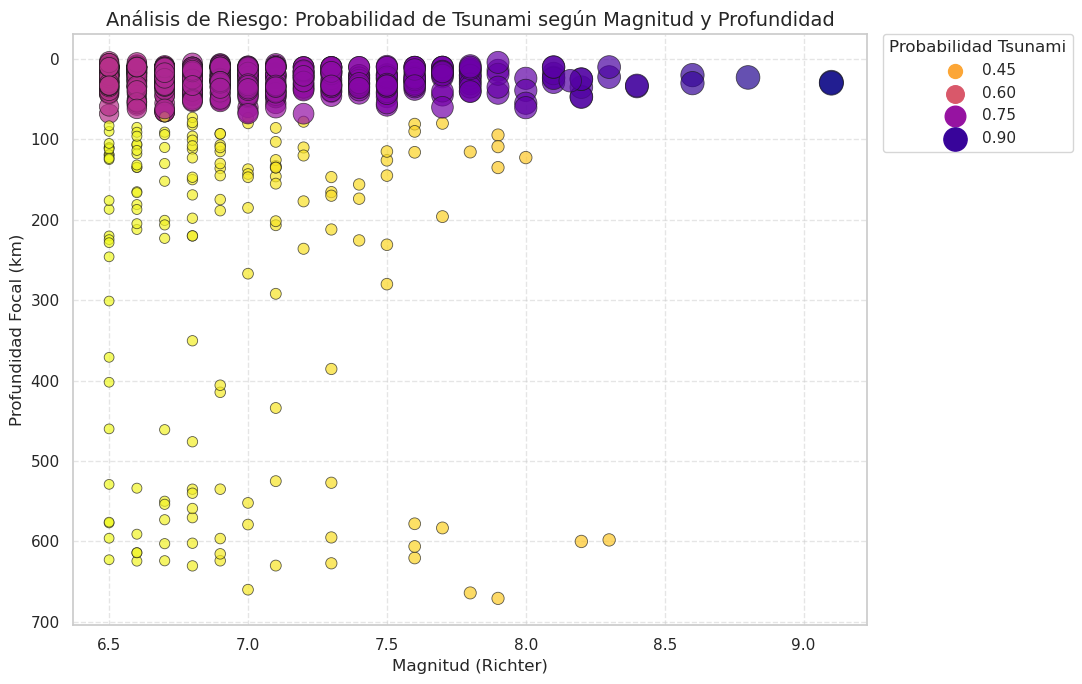

In [21]:
print("\n--- 5. Visualización de Resultados (Mejorada) ---")

# Extraer datos para visualizar
df_viz = pd.read_sql("""
SELECT e.magnitude, e.depth, ra.probabilidad_tsunami, ra.nivel_alerta
FROM events e
JOIN risk_assessment ra ON e.event_id = ra.event_id
""", conn)

plt.figure(figsize=(11, 7))

# Usamos 'hue' para la PROBABILIDAD (continuo) para que sea evidente
sns.scatterplot(
    data=df_viz,
    x="magnitude",
    y="depth",
    hue="probabilidad_tsunami",  # El color ahora muestra la probabilidad exacta
    palette="plasma_r",          # Gradiente de color: amarillo(bajo) -> morado/oscuro(alto)
    size="probabilidad_tsunami", # También usamos tamaño para reforzar (doble codificación)
    sizes=(50, 300),             # Rango de tamaños más notorio
    alpha=0.7,
    edgecolor="k"                # Borde negro para que los puntos claros se vean bien
)

plt.gca().invert_yaxis() # Profundidad: mayor es más abajo
plt.title("Análisis de Riesgo: Probabilidad de Tsunami según Magnitud y Profundidad", fontsize=14)
plt.xlabel("Magnitud (Richter)", fontsize=12)
plt.ylabel("Profundidad Focal (km)", fontsize=12)

# Ajustar la leyenda para que no ocupe demasiado espacio
plt.legend(title="Probabilidad Tsunami", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

El análisis valida que la profundidad focal actúa como un "interruptor" crítico para el riesgo de tsunami. Independientemente de la magnitud, los terremotos profundos (>70km) raramente generan tsunamis. La verdadera zona de peligro se limita exclusivamente a eventos que son simultáneamente superficiales y de gran magnitud.

In [22]:
# Cerrar la conexión al finalizar
conn.close()
print("Conexión a base de datos cerrada.")

Conexión a base de datos cerrada.
